In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,2*np.pi,256)
y = np.linspace(0,2*np.pi,256)
xx, yy = np.meshgrid(x,y)

image = np.sin(2*xx) + np.sin(2*yy)
noise_image = image + np.random.normal(loc = 0, 
                                       scale = 0.1,
                                       size = np.shape(image))



length = 5
window_length = 2*length + 1

average_filter = np.zeros_like(noise_image)
average_filter[:length+1,:length+1] = 1/window_length**2
average_filter[-length:,:length+1] = 1/window_length**2
average_filter[:length+1,-length:] = 1/window_length**2
average_filter[-length:,-length:] = 1/window_length**2

signal_smooth_filter = np.real(np.fft.irfft2(np.fft.rfft2(noise_image)*np.fft.rfft2(average_filter)))
signal_smooth_convolve = scipy.signal.convolve2d(noise_image, np.ones(window_length**2).reshape(window_length,window_length)/window_length**2, mode = "same", boundary = "wrap")

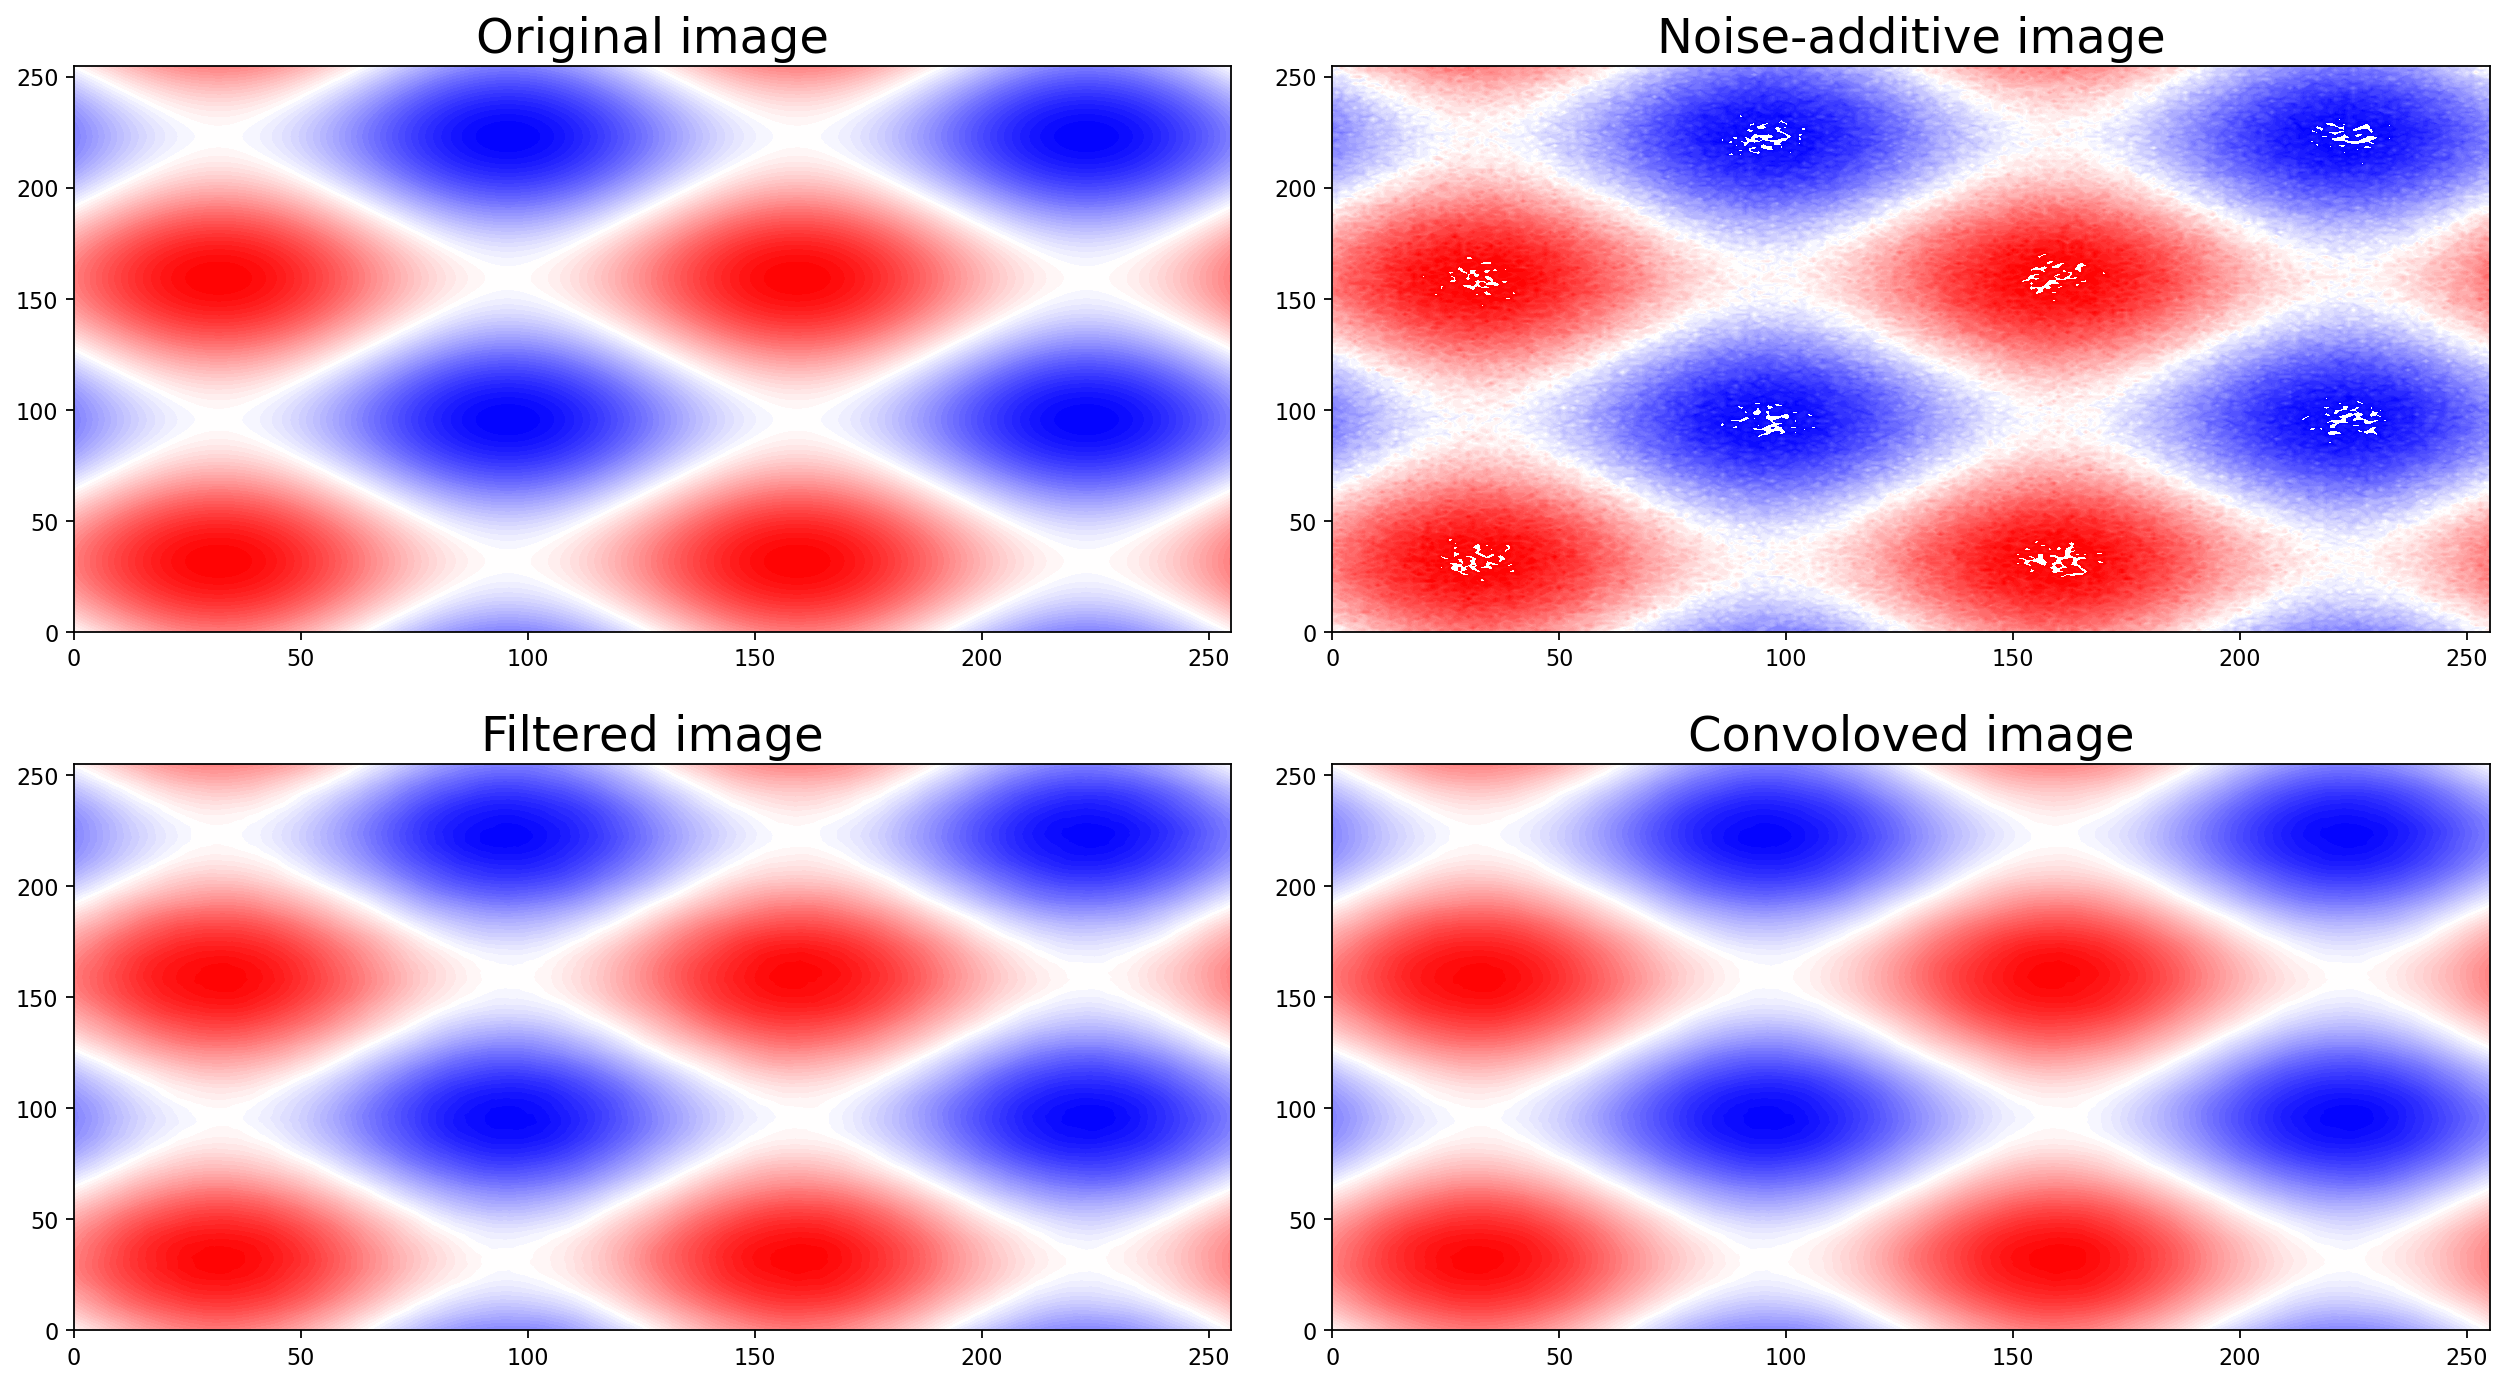

In [3]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2,
                         figsize = (16, 9),
                         dpi = 160)
plt.rcParams.update({'font.size': 18})
levels = np.linspace(-2,2,64)
axes[0,0].contourf(image, levels = levels, cmap = "bwr")
axes[0,0].set_title("Original image")
axes[0,1].contourf(noise_image, levels = levels, cmap = "bwr")
axes[0,1].set_title("Noise-additive image")
axes[1,0].contourf(signal_smooth_filter, levels = levels, cmap = "bwr")
axes[1,0].set_title("Filtered image")
axes[1,1].contourf(signal_smooth_convolve, levels = levels, cmap = "bwr")
axes[1,1].set_title("Convoloved image")
fig.set_tight_layout(True)